In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hp_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
hp_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [6]:
hp_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
non_numeric_columns = hp_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numerical columns is 43


In [8]:
numeric_columns = hp_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


In [9]:
# Missing values!
total_missing = hp_df.isnull().sum().sort_values(ascending=False)
percent_missing = (hp_df.isnull().sum()/hp_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


##### We will replace the missing value in numerical columns with the mean

In [10]:
# Fill in mean for all the numeric columns
for column in ['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice']:
    hp_df[column].fillna(hp_df[column].mean(), inplace=True)

#### We will replace the missing value in non-numerical columns with the mode

In [11]:
# Fill in mode for all the non-numeric columns
for column in ['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition']:
    hp_df[column].fillna(hp_df[column].mode()[0], inplace=True)

In [12]:
# sanity check
# Missing values!
total_missing = hp_df.isnull().sum().sort_values(ascending=False)
percent_missing = (hp_df.isnull().sum()/hp_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
saleprice,0,0.0
heating,0,0.0
roofstyle,0,0.0
roofmatl,0,0.0
exterior1st,0,0.0
exterior2nd,0,0.0
masvnrtype,0,0.0
masvnrarea,0,0.0
exterqual,0,0.0
extercond,0,0.0


In [13]:
# consolidate columns
hp_df.shape

(1460, 81)

In [14]:
ybs = hp_df["yrsold"] - hp_df["yearbuilt"]
ysr = hp_df["yrsold"] - hp_df["yearremodadd"]

hp_df["years_before_sale"] = ybs
hp_df["years_since_remodel"] = ysr

In [15]:
hp_df.shape

(1460, 83)

In [16]:
# dropping consolidated & irrelevent columns
hp_df= hp_df.drop(["id","yearremodadd", "yearbuilt", "saletype","mosold"], axis = 1)

In [17]:
hp_df.shape

(1460, 78)

In [18]:
# verify the new columns in the dataset
hp_df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolarea,poolqc,fence,miscfeature,miscval,yrsold,salecondition,saleprice,years_before_sale,years_since_remodel
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2008,Normal,208500,5,5
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,2007,Normal,181500,31,31
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2008,Normal,223500,7,6
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2006,Abnorml,140000,91,36
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,2008,Normal,250000,8,8


In [19]:
# Feature Selection

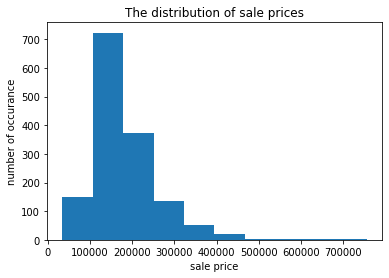

In [20]:
plt.hist(hp_df.saleprice)
plt.title("The distribution of sale prices")
plt.xlabel("sale price")
plt.ylabel("number of occurance")
plt.savefig("img/TargetDist.png", bbox_inches='tight', pad_inches=2)
plt.show()

In [21]:
# Graph above shows that the target variable salaprice is distributed non-normally

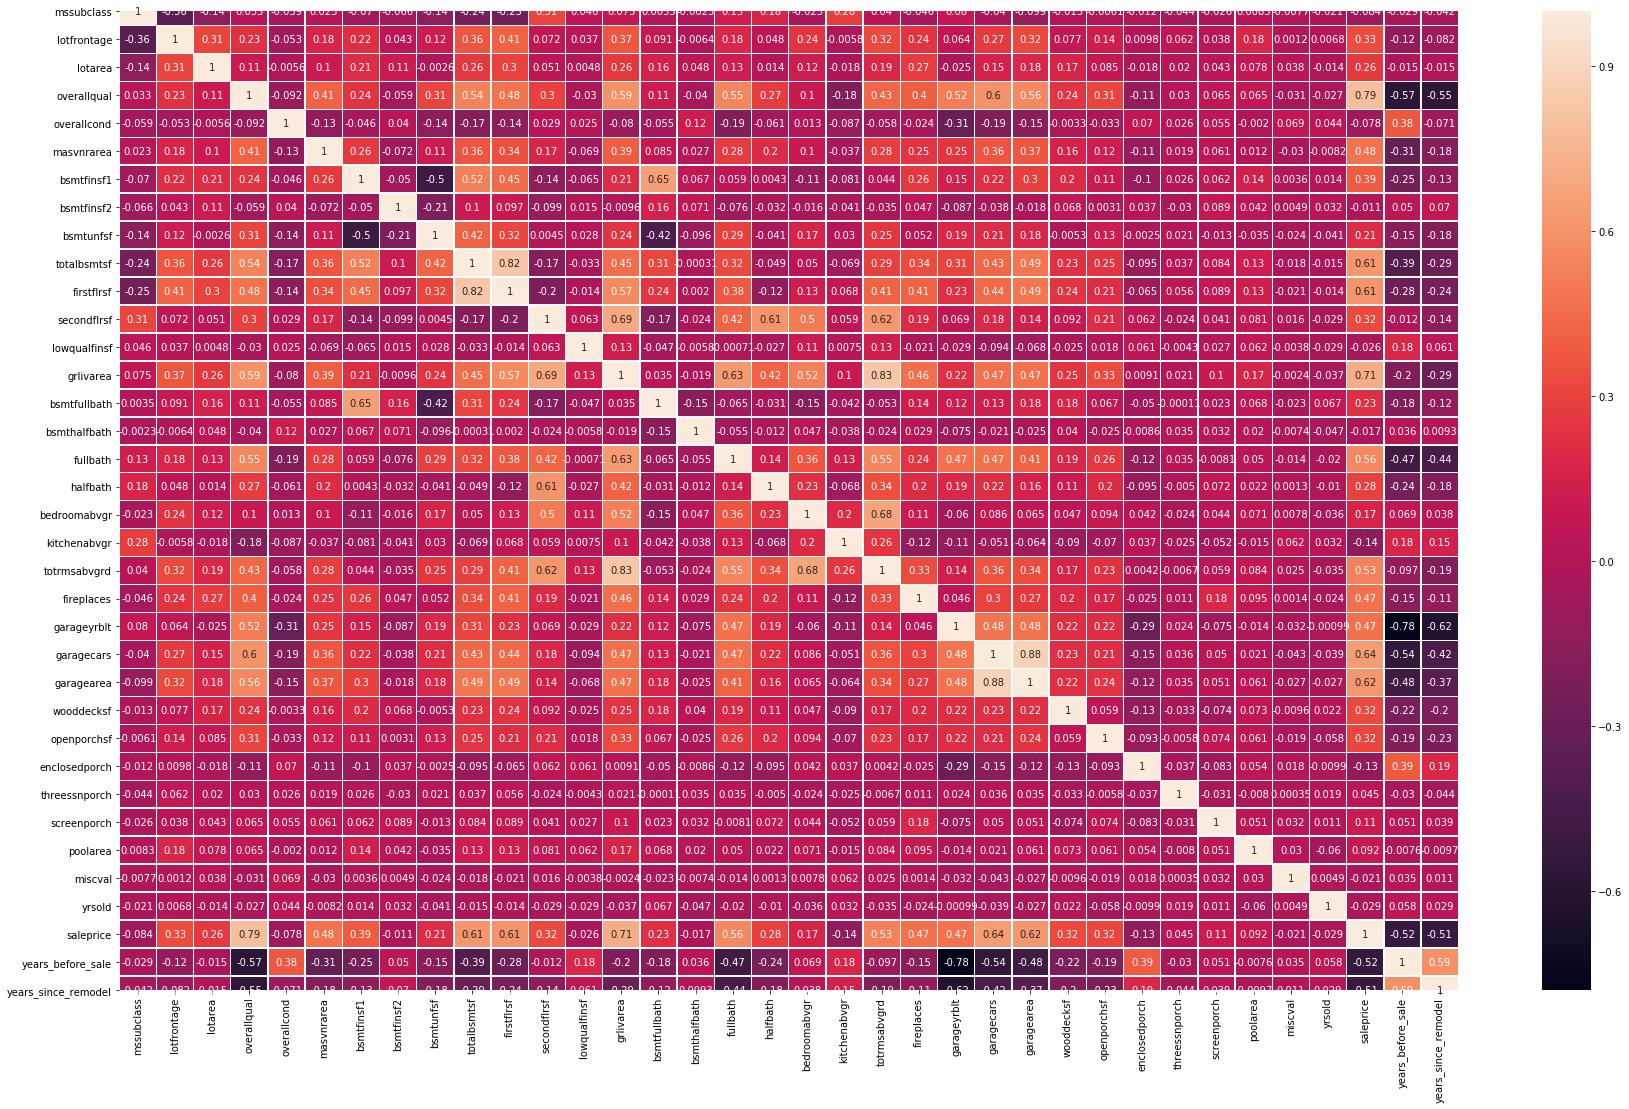

In [22]:
# calculate the correlation matrix
corr = hp_df.corr()

# plot the heatmap
plt.figure(figsize=(30,18))
sns.heatmap(corr, 
        xticklabels=corr.columns,annot=True, linewidths=.5,
        yticklabels=corr.columns)
plt.savefig("img/CorrMatHeatmap.png")

In [23]:
hp_df.corr()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,...,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,yrsold,saleprice,years_before_sale,years_since_remodel
mssubclass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.021407,-0.084284,-0.028746,-0.041968
lotfrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.179283,0.215828,0.043340,0.122156,0.363358,...,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.006768,0.334901,-0.117117,-0.082329
lotarea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.103960,0.214103,0.111170,-0.002618,0.260833,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843,-0.014832,-0.014709
overallqual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.410238,0.239666,-0.059119,0.308159,0.537808,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,-0.027347,0.790982,-0.572629,-0.552570
overallcond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,0.043950,-0.077856,0.377325,-0.070931
masvnrarea,0.022895,0.179283,0.103960,0.410238,-0.127788,1.000000,0.263582,-0.072302,0.114184,0.362452,...,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.008184,0.475241,-0.314613,-0.179754
bsmtfinsf1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.263582,1.000000,-0.050117,-0.495251,0.522396,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420,-0.248483,-0.127556
bsmtfinsf2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.072302,-0.050117,1.000000,-0.209294,0.104810,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378,0.050422,0.069814
bsmtunfsf,-0.140759,0.122156,-0.002618,0.308159,-0.136841,0.114184,-0.495251,-0.209294,1.000000,0.415360,...,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.214479,-0.150619,-0.183830
totalbsmtsf,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.362452,0.522396,0.104810,0.415360,1.000000,...,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,-0.014969,0.613581,-0.391498,-0.292096


In [24]:
# we derive the correlations of the features with our target variable irrespective of their signs 
# by taking absolute values.

In [25]:
# re-assign numerical columns with newly created and dropped columns
numeric_columns = hp_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea',
       'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
       'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt',
       'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval',
       'yrsold', 'saleprice', 'years_before_sale', 'years_since_remodel'],
      dtype='object')
The number of numerical columns is 36


In [26]:
# re-assign non numerical columns with the dropped columns
non_numeric_columns = hp_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'salecondition'],
      dtype='object')
The number of non-numerical columns is 42


In [27]:

np.abs(hp_df[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)
# The sorted value here is important to be used in the modeling

saleprice              1.000000
overallqual            0.790982
grlivarea              0.708624
garagecars             0.640409
garagearea             0.623431
totalbsmtsf            0.613581
firstflrsf             0.605852
fullbath               0.560664
totrmsabvgrd           0.533723
years_before_sale      0.523350
years_since_remodel    0.509079
masvnrarea             0.475241
garageyrblt            0.470177
fireplaces             0.466929
bsmtfinsf1             0.386420
lotfrontage            0.334901
wooddecksf             0.324413
secondflrsf            0.319334
openporchsf            0.315856
halfbath               0.284108
lotarea                0.263843
bsmtfullbath           0.227122
bsmtunfsf              0.214479
bedroomabvgr           0.168213
kitchenabvgr           0.135907
enclosedporch          0.128578
screenporch            0.111447
poolarea               0.092404
overallcond            0.077856
threessnporch          0.044584
yrsold                 0.028923
lowqualf

#### To understand the univariate relation between our target variable and non-numerical features. We plot each feature against the target variable. Charts below, we show the average sale prices with respect to the each categories of a feature.

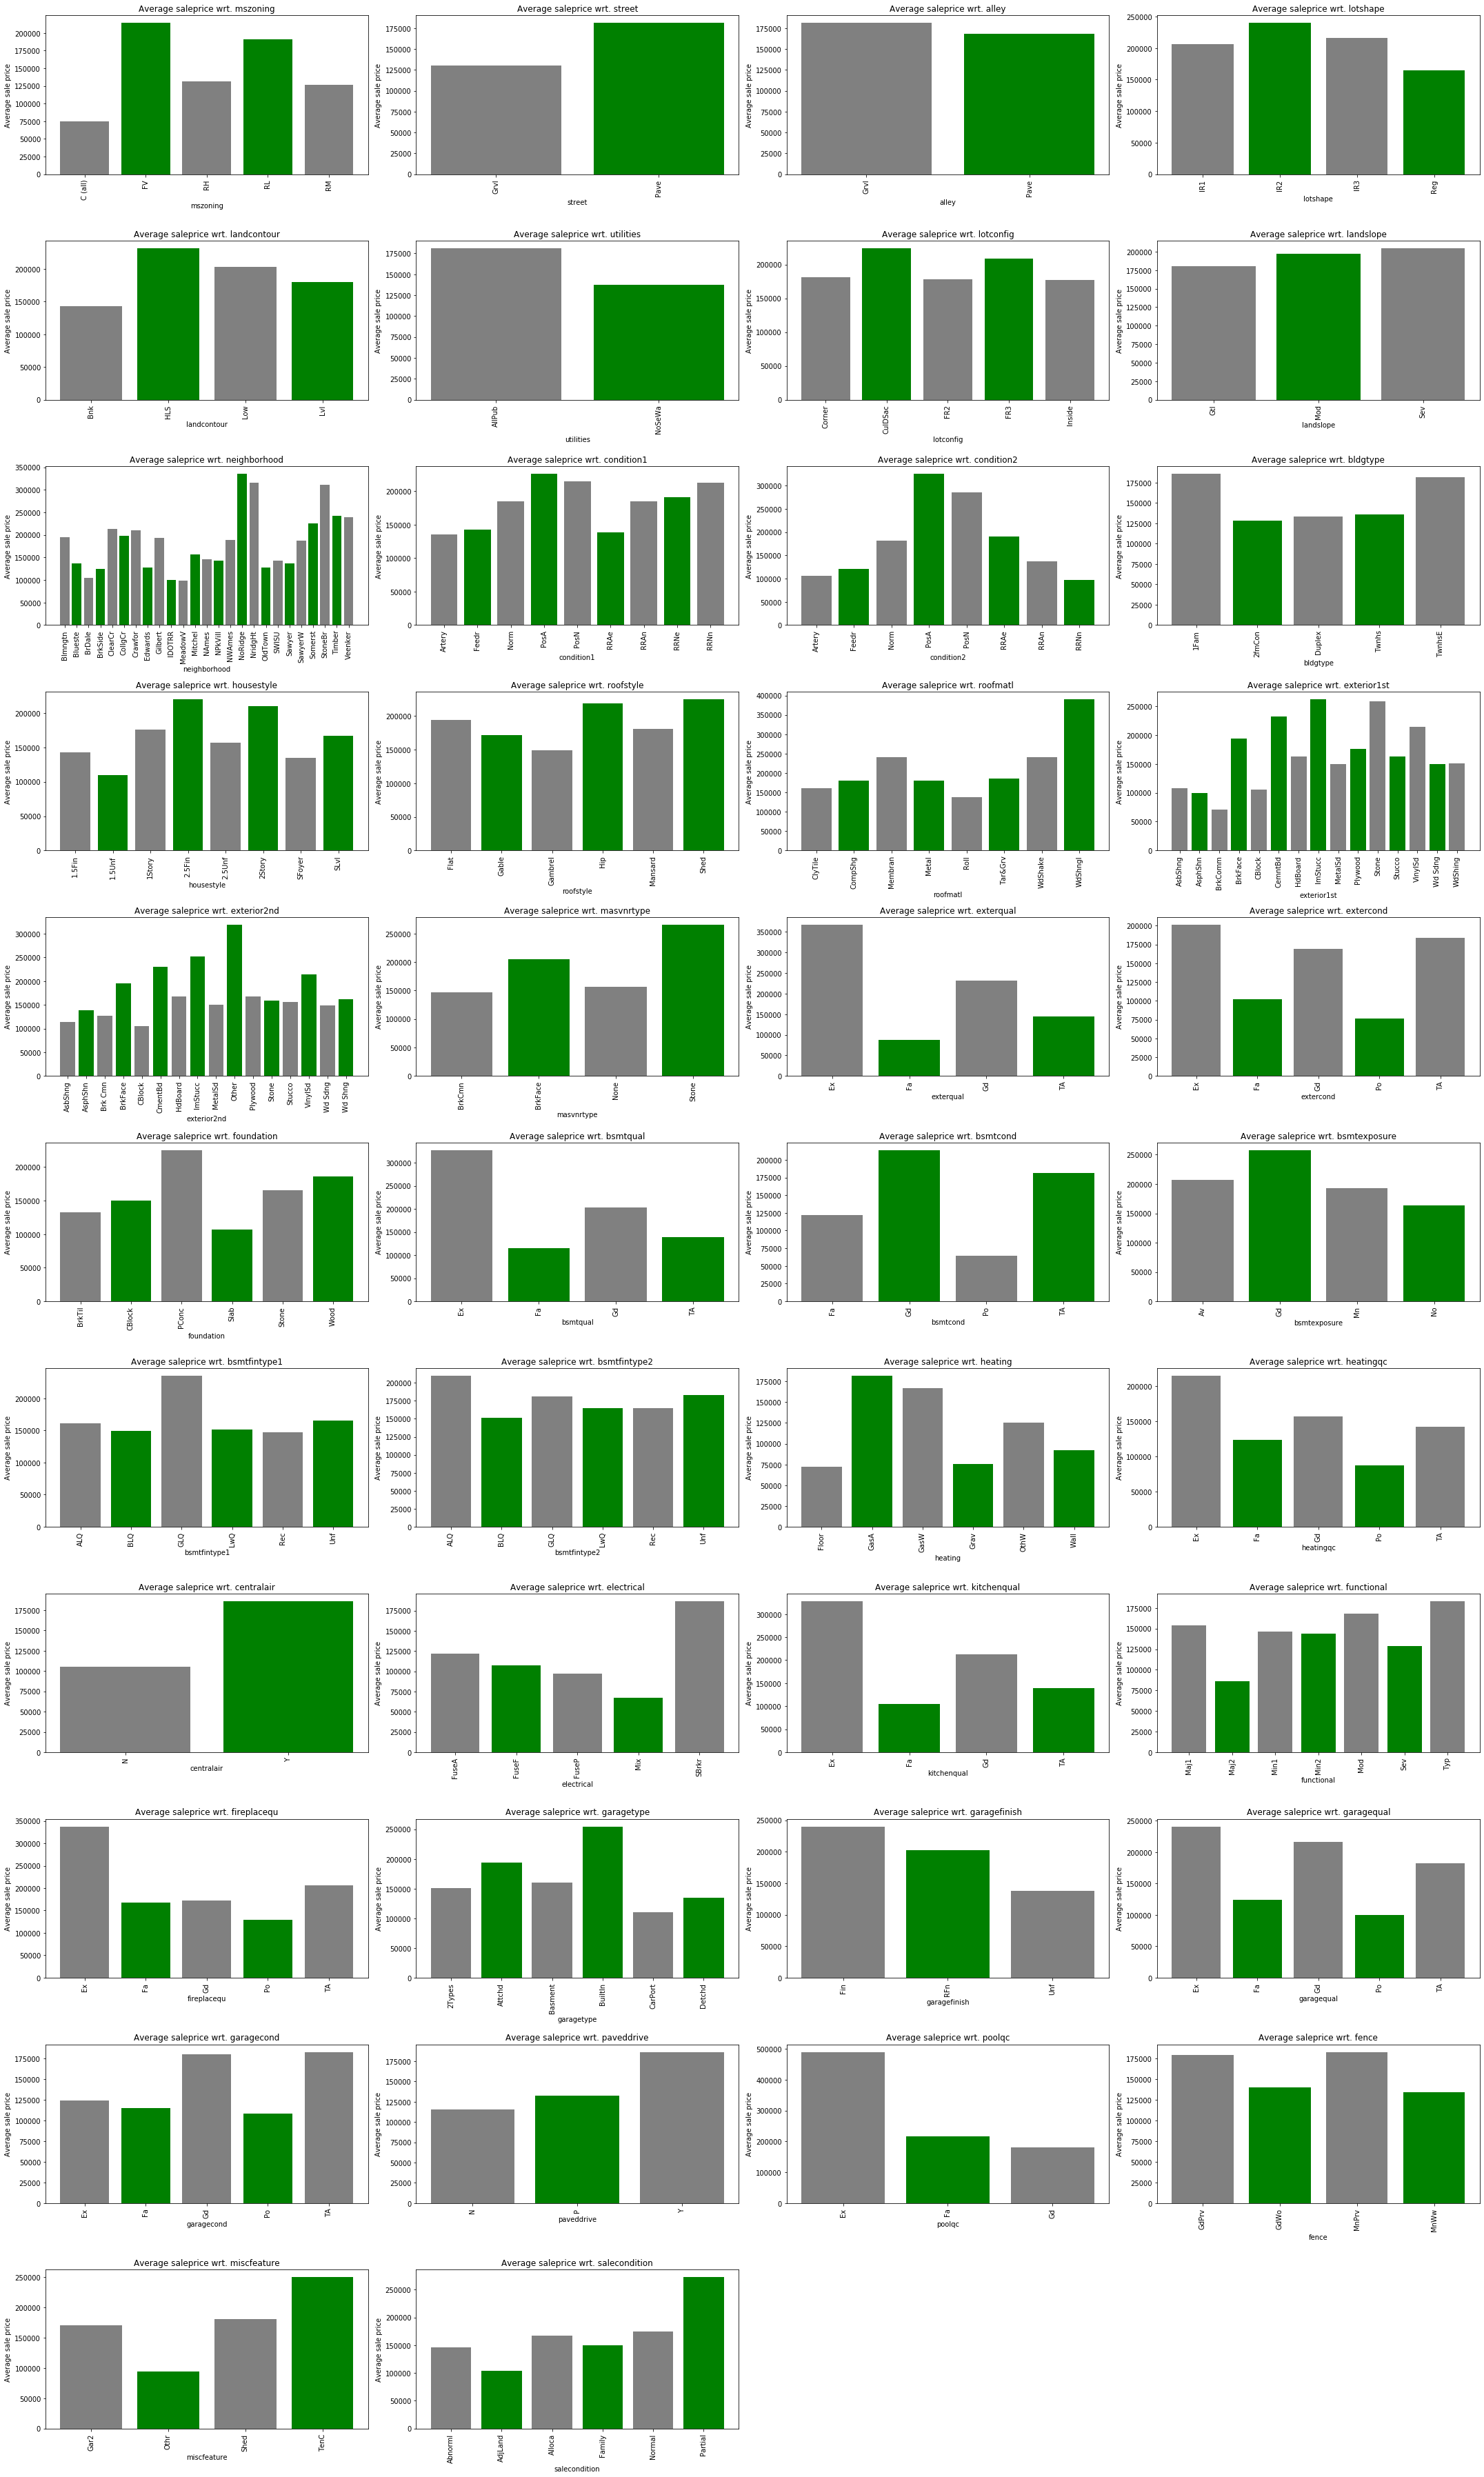

In [28]:
plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(hp_df.groupby(column)["saleprice"].mean().index, hp_df.groupby(column)["saleprice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.savefig("img/Univariate.png", bbox_inches='tight', pad_inches=2)
plt.show()

#### For modeling, we choose 5 numerical values that are highly correlated with saleprice. Also, adding 2 non-numerical features, mszoning & street. Their values exhibit some variance with respect to the average sale price. To use no-numerical values, we need to convert them to dummy variables

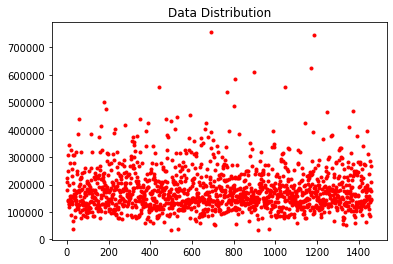

In [35]:
## Data Distribution
fig = plt.figure()
plt.plot([i for i in range(1,1461)],y,'r.')
plt.title('Data Distribution')
plt.savefig("img/dataDist.png", bbox_inches='tight', pad_inches=2)
plt.show()

In [31]:
hp_df = pd.concat([hp_df,pd.get_dummies(hp_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
hp_df = pd.concat([hp_df,pd.get_dummies(hp_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(hp_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(hp_df.street, prefix="street", drop_first=True).columns)



In [36]:
# Model Creation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals import joblib
# to verify accuracy
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

#### Linear Regression Model

# Modelling

X = hp_df[['mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'grlivarea', 'bsmtfullbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'screenporch',
       'poolarea'] + dummy_column_names]
y = hp_df.saleprice

# Modelling- original

X = hp_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]
y = hp_df.saleprice

In [33]:
# Modelling

X = hp_df[['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 
            'masvnrarea', 'bsmtfinsf1', 'bsmtunfsf', 
           'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'grlivarea', 'bsmtfullbath', 
           'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 
           'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 
           'openporchsf', 'enclosedporch', 'screenporch', 'poolarea'] + dummy_column_names]
y = hp_df.saleprice

In [37]:
# split the data 70% for training & 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [38]:
# Model #1: Linear Regressor
lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_predictions = lnr.predict(X_test)

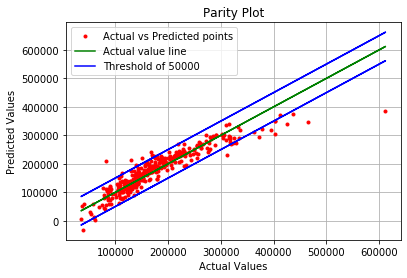

In [40]:
## PARITY PLOT
y_testp = y_test[:]+50000
y_testm = y_test[:]-50000
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
plt.plot(y_test,y_predictions,'r.') 
plt.plot(y_test,y_test,'k-',color = 'green')
plt.plot(y_test,y_testp,color = 'blue')
plt.plot(y_test,y_testm,color = 'blue')
plt.title('Parity Plot')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
plt.legend(['Actual vs Predicted points','Actual value line','Threshold of 50000'])
plt.savefig("img/parityPlot.png", bbox_inches='tight', pad_inches=2)
plt.show()

In [41]:
# to find the difference between trained & predicted value
mean_squared_error = mean_squared_error(y_test, y_predictions)
# the error in our model
rootMeanSquaredError = sqrt(mean_squared_error)

In [42]:
print("Number of predictions: " , len(y_predictions))
print("Mean Squared Error: " , mean_squared_error)
print("Root Mean Squared Error: " , rootMeanSquaredError)
print("Scoring: " , lnr.score(X_test, y_test))

Number of predictions:  365
Mean Squared Error:  886118055.2372919
Root Mean Squared Error:  29767.73513785172
Scoring:  0.8554164097545213


#### Conclusion: Score is 85%. It's a good start and we can use this model as a baseline for other models for further improvement.
#### Side Note: Prior to consolidation & dropping the irrelevent columns, the score was in lower 60%. Columns optimization can improve the score.

In [43]:
# Un-comment to create a new pickle file
# pd.to_pickle(hp_df, "./saleprice_1.pkl")

#### Let's use other models and compare our baseline result: